Descompresion de datos

In [ ]:
import missingno as msno
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [ ]:
def descomprimir_zips_en_datos():
    """
    Descomprime todos los archivos ZIP encontrados en el directorio actual
    dentro de una subcarpeta llamada 'datos'.
    """
    carpeta_destino = "datos"

    # Crear la carpeta 'datos' si no existe
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)
        print(f"Carpeta '{carpeta_destino}' creada.")

    # Obtener una lista de todos los archivos en el directorio actual
    archivos_en_directorio = os.listdir('.')

    # Filtrar solo los archivos .zip
    archivos_zip = [f for f in archivos_en_directorio if f.endswith('.zip')]

    if not archivos_zip:
        print("No se encontraron archivos ZIP en el directorio actual.")
        return

    print(f"Archivos ZIP encontrados: {archivos_zip}")

    for archivo_zip in archivos_zip:
        ruta_completa_zip = os.path.join('.', archivo_zip)
        try:
            with zipfile.ZipFile(ruta_completa_zip, 'r') as zip_ref:
                zip_ref.extractall(os.path.join('.', carpeta_destino))
            print(f"'{archivo_zip}' descomprimido exitosamente en '{carpeta_destino}'.")
        except zipfile.BadZipFile:
            print(f"Error: '{archivo_zip}' no es un archivo ZIP v√°lido o est√° corrupto.")
        except Exception as e:
            print(f"Ocurri√≥ un error al descomprimir '{archivo_zip}': {e}")

descomprimir_zips_en_datos()

Archivos ZIP encontrados: ['estadisticas_normales_9120.zip', 'Registro_temperaturas-05072025.zip']
'estadisticas_normales_9120.zip' descomprimido exitosamente en 'datos'.
'Registro_temperaturas-05072025.zip' descomprimido exitosamente en 'datos'.


In [ ]:
# Opcional: Para mejorar la visualizaci√≥n en el notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

nombre_excel = "Estad√≠sticas normales Datos abiertos 1991-2020.xlsx"
ruta_completa = os.path.join('datos', nombre_excel)

if not os.path.exists(ruta_completa):
    print(f"Error: El archivo '{ruta_completa}' no se encontr√≥. Aseg√∫rate de que el archivo ZIP se descomprimi√≥ correctamente y el archivo .xlsx est√° en la carpeta 'datos'.")
else:
    print(f"Intentando cargar '{nombre_excel}' sin especificar 'header' inicialmente para inspeccionar...")
    try:
        # Cargar sin especificar header para ver el raw data y encontrar la fila correcta
        df_raw = pd.read_excel(ruta_completa, header=None)

        print("\n--- Primeras 10 filas del archivo SIN HEADER ESPECIFICADO ---")
        # .to_string() es √∫til para ver todas las columnas sin truncar en el notebook
        print(df_raw.head(10).to_string())

        print("\n--- Tipo de datos de las columnas SIN HEADER ESPECIFICADO ---")
        df_raw.info()

        # Intentar encontrar la fila que contiene "Estaci√≥n" y "Valor Medio de"
        # Buscamos en las primeras 10 filas para ser eficientes
        header_row_index = -1
        for i in range(min(10, len(df_raw))):
            # Convertir la fila a string y a min√∫sculas para una b√∫squeda insensible a may√∫sculas y manejar NaNs
            row_as_str = df_raw.iloc[i].astype(str).str.lower()
            if ('estaci√≥n' in row_as_str.values and 'valor medio de' in row_as_str.values):
                header_row_index = i
                break

        if header_row_index != -1:
            print(f"\n¬°Encabezado detectado en la fila (0-indexada): {header_row_index}!")
            print(f"Las columnas en esa fila son: {df_raw.iloc[header_row_index].tolist()}")
        else:
            print("\nNo se pudo encontrar la fila del encabezado que contiene 'Estaci√≥n' y 'Valor Medio de' en las primeras 10 filas.")
            print("Por favor, revise la salida anterior para identificar la fila manualmente.")
            print("Si la fila 3 (√≠ndice 3) parece correcta, establezca `header_row_index = 3` manualmente y re-ejecute la siguiente celda.")

    except Exception as e:
        print(f"Ocurri√≥ un error al intentar la carga inicial para depuraci√≥n: {e}")


Intentando cargar 'Estad√≠sticas normales Datos abiertos 1991-2020.xlsx' sin especificar 'header' inicialmente para inspeccionar...

--- Primeras 10 filas del archivo SIN HEADER ESPECIFICADO ---
                                                                                                                                                                                                                                                                                                                                             0                                        1     2     3     4     5     6     7     8     9     10    11    12    13
0                                                                                                                                                                                                                                                                                      Estad√≠sticas Climatol√≥gicas Normales - per√≠odo 1991-2020                  

In [ ]:
df_raw.isnull()  # DataFrame booleano
df_raw.isna().sum() 
df_raw.isna().mean().round(4)*100 

0     0.25
1     0.51
2     0.51
3     0.51
4     0.51
5     0.51
6     0.51
7     0.51
8     0.51
9     0.51
10    0.51
11    0.51
12    0.51
13    0.51
dtype: float64

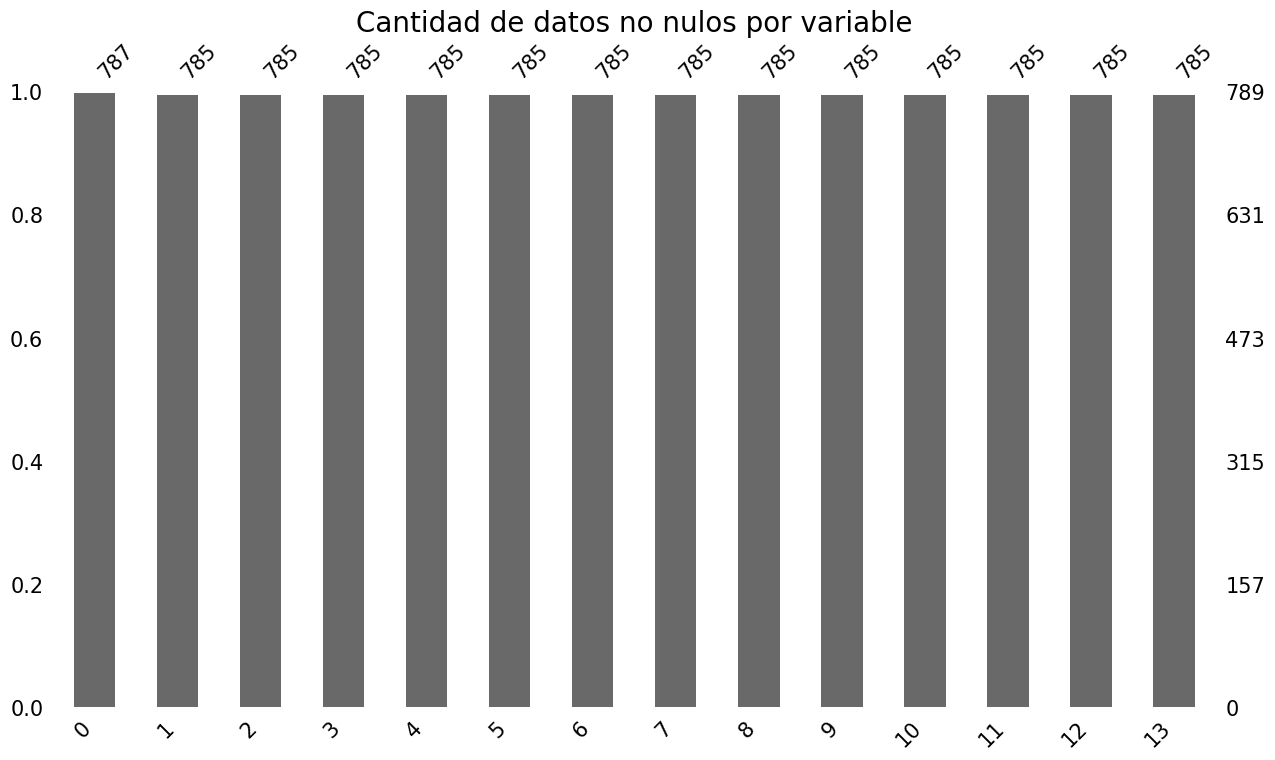

In [ ]:
msno.bar(df_raw, fontsize=15, figsize=(15,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

In [ ]:
if 'header_row_index' not in locals() or header_row_index == -1:
    print("El √≠ndice del encabezado no fue detectado autom√°ticamente. Por favor, rev√≠salo en la celda anterior y establ√©celo manualmente.")
    print("Por ejemplo: header_row_index = 3")
else:
    try:
        # Cargar el Excel usando el header_row_index identificado
        df = pd.read_excel(ruta_completa, header=header_row_index)
        print(f"Archivo '{nombre_excel}' cargado exitosamente con encabezado en la fila {header_row_index}.")

        print("\n--- Primeras 5 filas del DataFrame despu√©s de la carga inicial ---")
        print(df.head())
        print("\n--- Nombres de columnas despu√©s de la carga inicial ---")
        print(df.columns.tolist())
        print("\n--- Informaci√≥n del DataFrame despu√©s de la carga inicial ---")
        df.info()
        
        # 2. Manejo de valores faltantes (S/D) y conversi√≥n a num√©rico
        meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

        columnas_numericas_potenciales = list(meses) + [
            'Temperatura_C', 'Temperatura_Maxima_C', 'Temperatura_Minima_C',
            'Humedad_Relativa_Porcentaje', 'Velocidad_Viento_kmh',
            'Nubosidad_Octavos', 'Precipitacion_mm', 'Frecuencia_Dias_Precipitacion_gt_1mm'
        ]
        columnas_a_procesar = [col for col in columnas_numericas_potenciales if col in df.columns]

        for col in columnas_a_procesar:
            # Reemplazar 'S/D' por NaN y luego convertir a num√©rico.
            df[col] = df[col].astype(str).replace('S/D', np.nan)
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # 3. Limpieza de la columna 'Estaci√≥n' (manejo del asterisco)
        df['Estacion_Limpia'] = df['Estaci√≥n'].astype(str).str.replace('*', '', regex=False).str.strip()
        df['Periodo_Normalizado_Completo'] = ~df['Estaci√≥n'].astype(str).str.contains('*', regex=False)

        # 4. Eliminar filas completamente vac√≠as al final
        # Usar las columnas clave para determinar si una fila est√° vac√≠a
        df.dropna(how='all', subset=['Estaci√≥n', 'Tipo_Variable'] + [m for m in meses if m in df.columns], inplace=True)

        print("\n--- DataFrame despu√©s de preprocesamiento inicial (primeras 10 filas) ---")
        print(df.head(10).to_string()) # Usar to_string para ver todo
        print("\n--- Informaci√≥n del DataFrame despu√©s de preprocesamiento inicial ---")
        df.info()
        print("\n--- Valores nulos por columna despu√©s de preprocesamiento inicial ---")
        print(df.isnull().sum())

    except Exception as e:
        print(f"Ocurri√≥ un error durante el preprocesamiento inicial: {e}")

Archivo 'Estad√≠sticas normales Datos abiertos 1991-2020.xlsx' cargado exitosamente con encabezado en la fila 4.

--- Primeras 5 filas del DataFrame despu√©s de la carga inicial ---
                 Estaci√≥n                           Valor Medio de   Ene   Feb   Mar   Abr   May   Jun   Jul   Ago   Sep   Oct   Nov   Dic
0  LA QUIACA OBSERVATORIO                         Temperatura (¬∞C)  13.2    13  12.8  11.3   7.3   4.8   4.5     7    10  12.4  13.4  13.9
1  LA QUIACA OBSERVATORIO                  Temperatura m√°xima (¬∞C)  20.6  20.4  20.6  20.3  17.8  16.3  16.1    18    20  21.7  22.5  22.2
2  LA QUIACA OBSERVATORIO                  Temperatura m√≠nima (¬∞C)   7.7   7.6   6.6   3.1  -2.5  -5.7  -6.2    -4  -0.4   3.3   5.5   7.3
3  LA QUIACA OBSERVATORIO                     Humedad relativa (%)  62.6  63.2  60.3    46  32.6  27.4  25.7  26.7  32.1  42.4  48.6  55.8
4  LA QUIACA OBSERVATORIO  Velocidad del Viento (km/h) (2011-2020)   6.5   6.8   6.7   5.5   4.8   5.5   5.9   6.7   

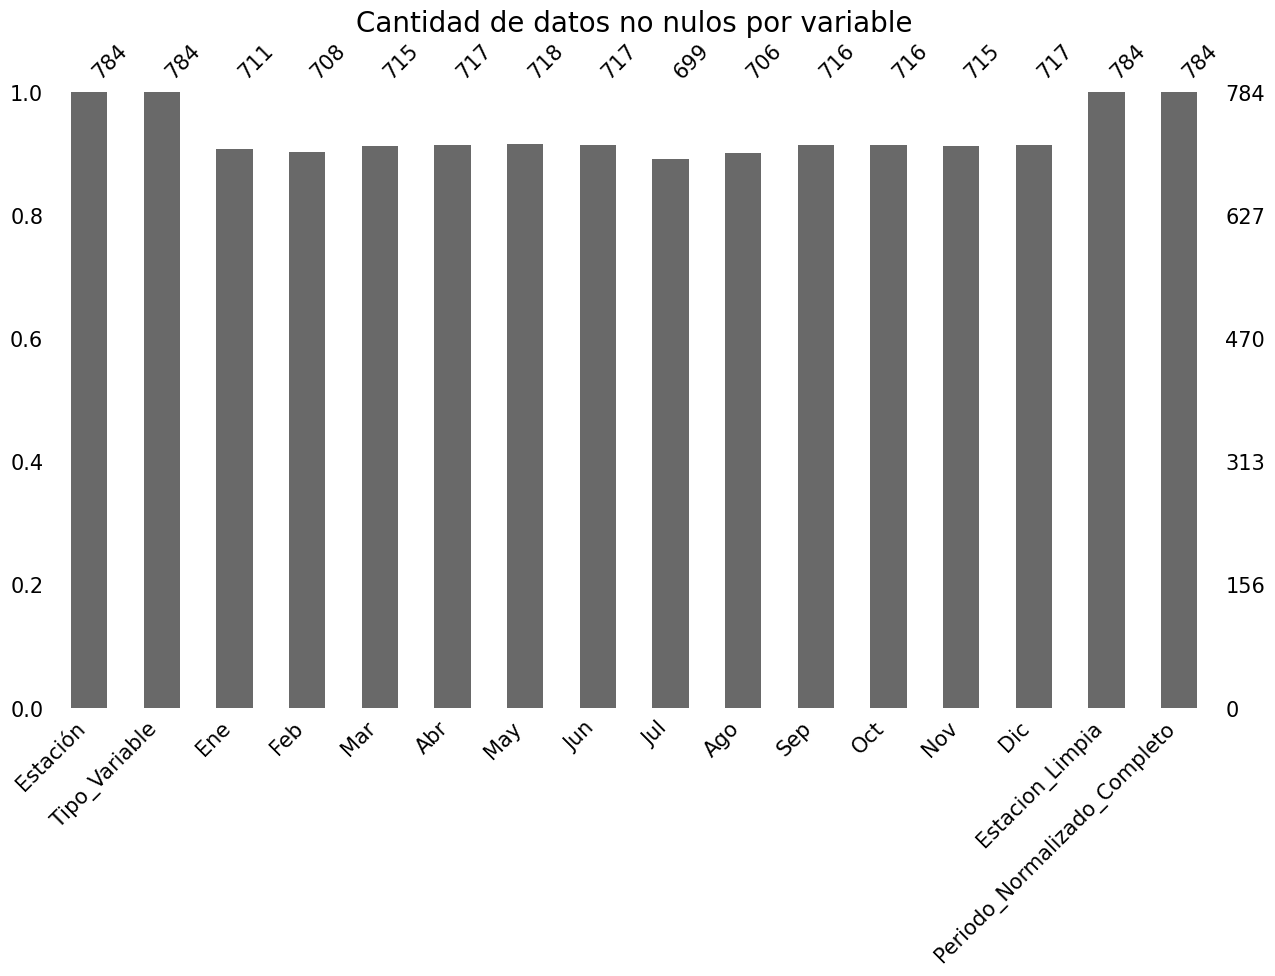

In [27]:
df.isnull()  # DataFrame booleano
df.isna().sum() 
df.isna().mean().round(4)*100 
msno.bar(df, fontsize=15, figsize=(15,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

<Axes: >

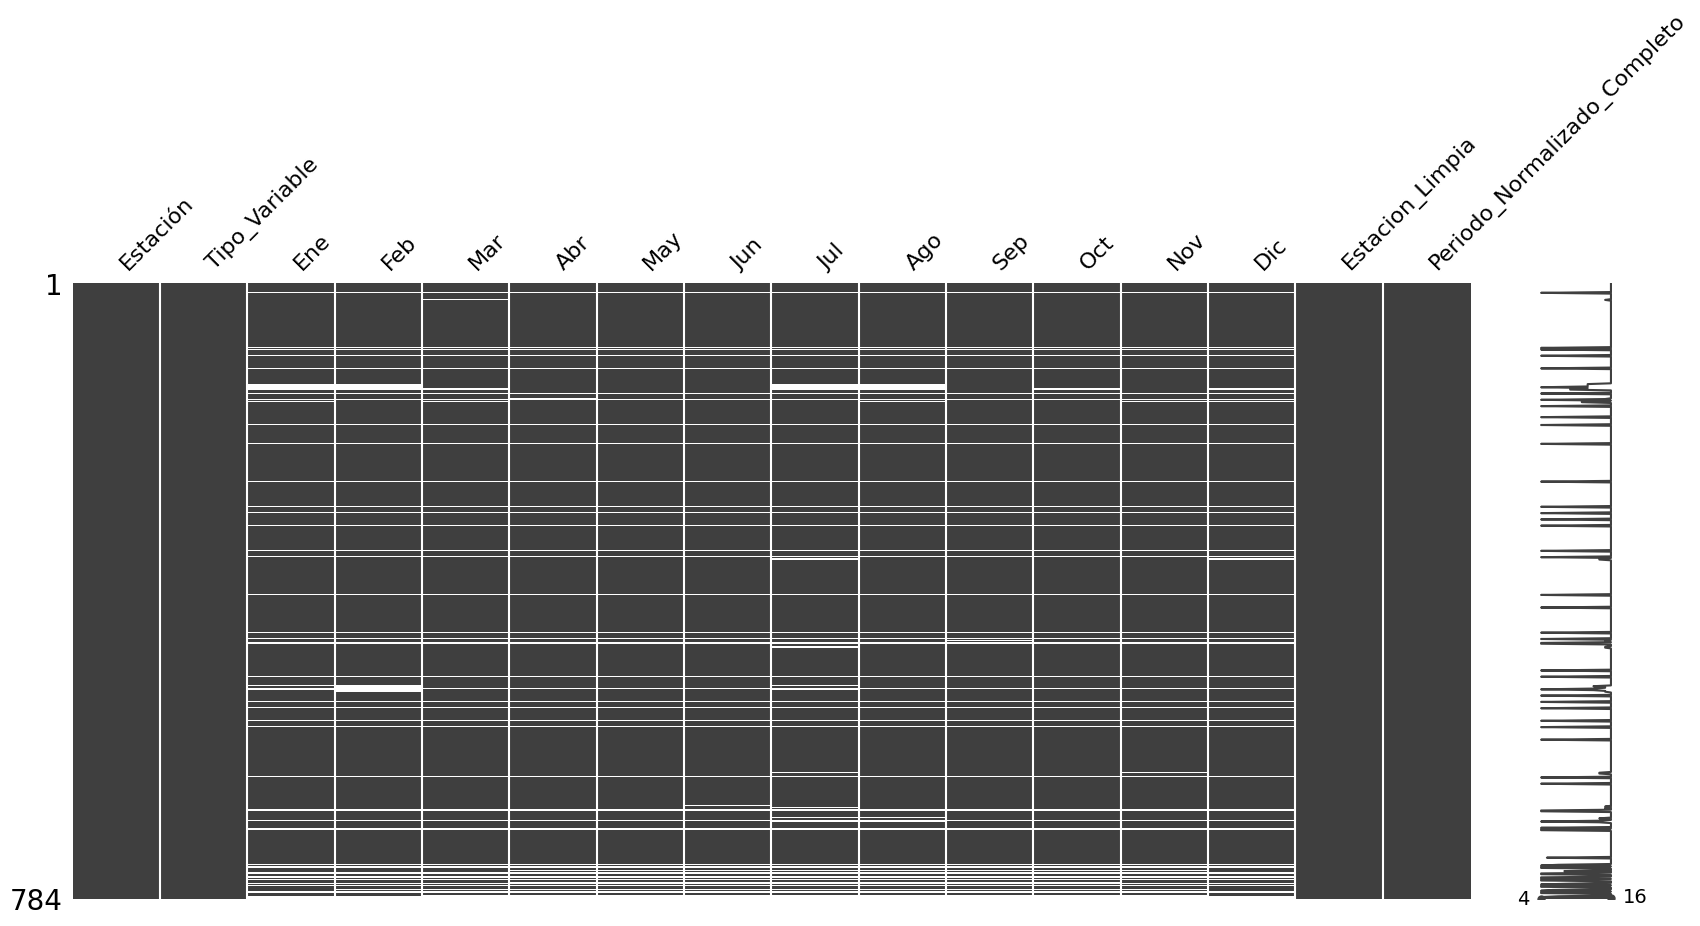

In [28]:
msno.matrix(df, figsize=(20,8))

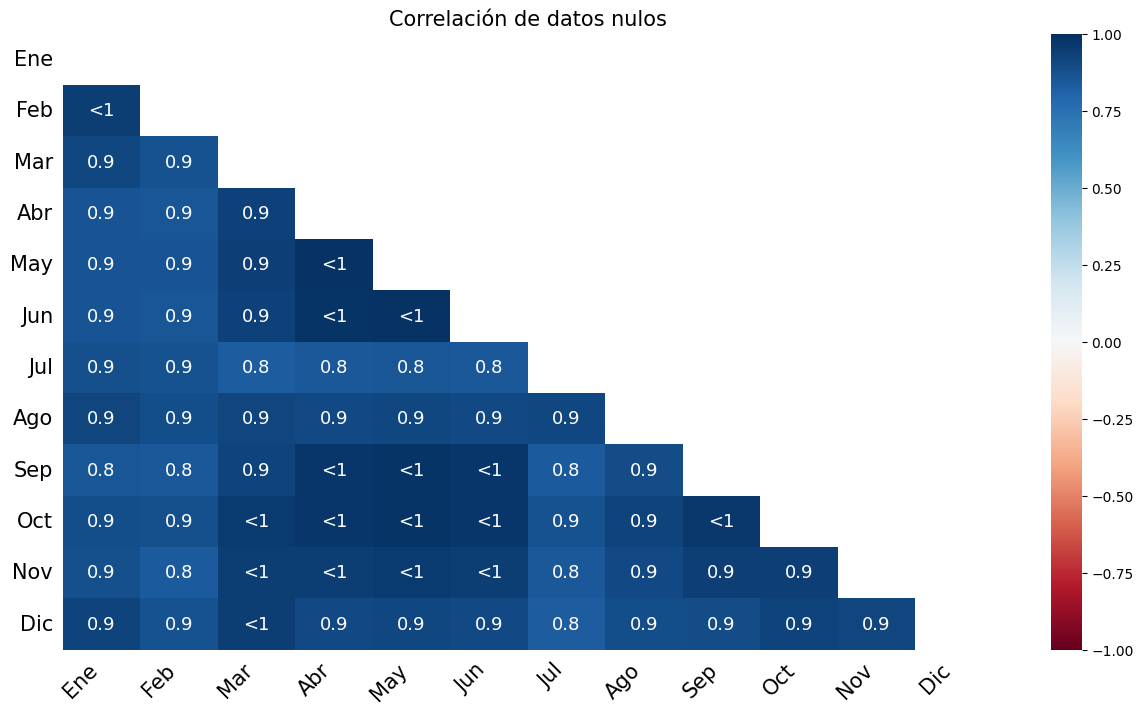

In [31]:
msno.heatmap(df, fontsize=15, figsize=(15,8))
plt.title("Correlaci√≥n de datos nulos", fontsize=15)
plt.show()

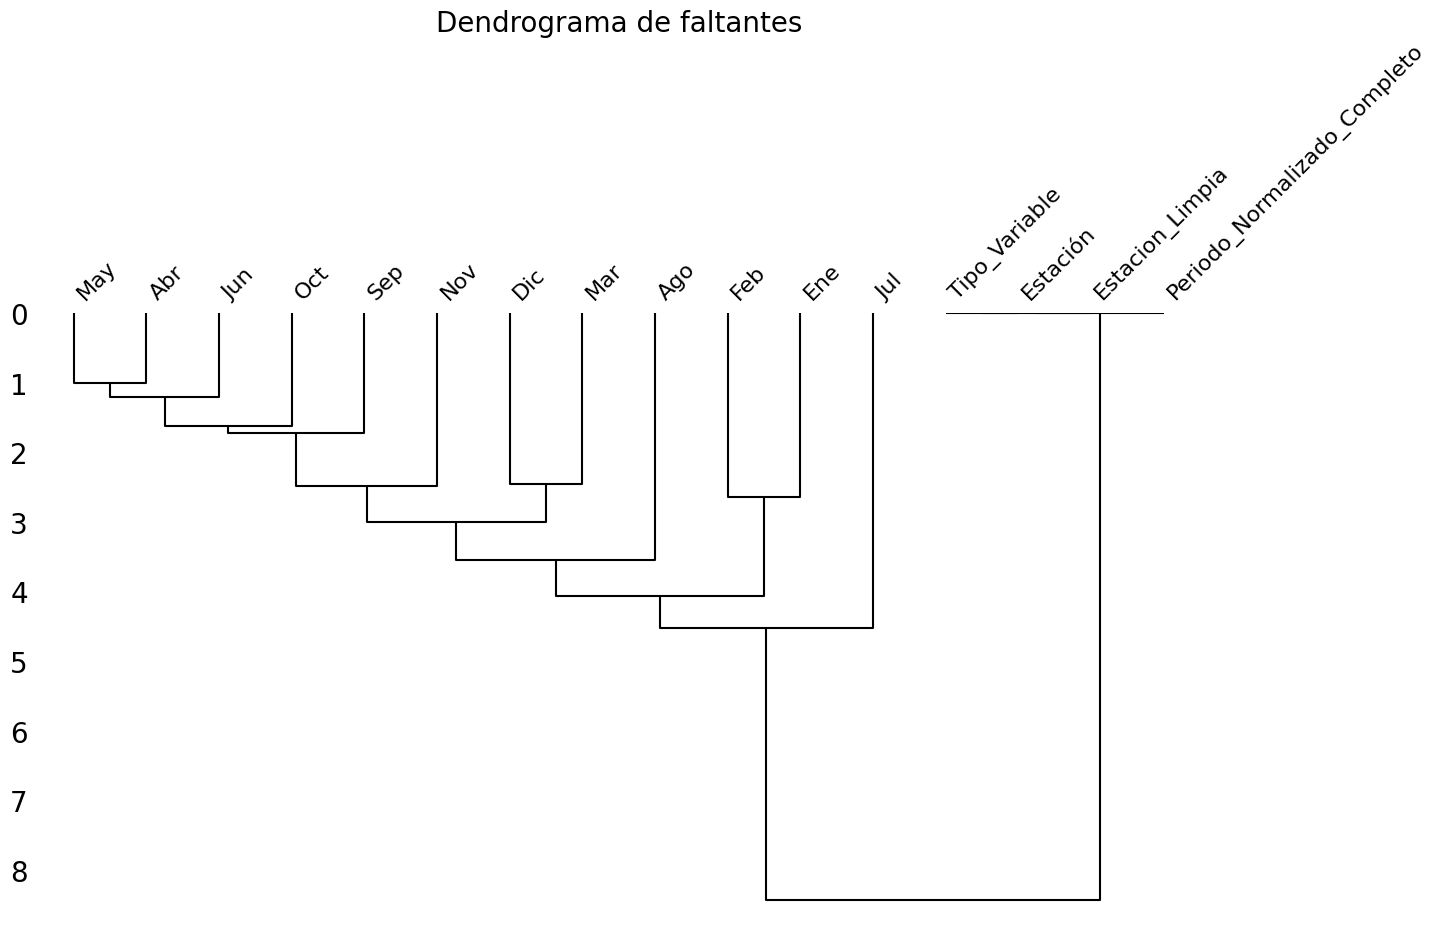

In [32]:
msno.dendrogram(df, figsize=(15,8))
plt.title('Dendrograma de faltantes', fontsize=20)
plt.show()

In [ ]:
# Creamos una funci√≥n para calcular el porcentaje de nulos en una columna, agrupando por una o m√°s columnas
def nulos_por_grupo(df, grupo_cols, target_col):
    agrupar_nulos = (
        df.groupby(grupo_cols, observed=True)[target_col]
        .apply(lambda x: x.isnull().mean() * 100)
        .reset_index(name=f'porcentaje_nulos_{target_col}')
    )
    return agrupar_nulos

nulos_May_por_Abr = nulos_por_grupo(df, 'May', 'Abr')
nulos_Ene_por_Feb = nulos_por_grupo(df, 'Ene', 'Feb')


# Resultados:
print("Nulos en 'May' por Abr:\n", nulos_May_por_Abr, "\n")
print("Nulos en 'Ene' por Feb:\n", nulos_Ene_por_Feb, "\n")

                 Estaci√≥n                                      Tipo_Variable    Ene   Feb   Mar   Abr   May   Jun   Jul   Ago   Sep   Oct   Nov   Dic         Estacion_Limpia  Periodo_Normalizado_Completo
0  LA QUIACA OBSERVATORIO                                   Temperatura (¬∞C)   13.2  13.0  12.8  11.3   7.3   4.8   4.5   7.0  10.0  12.4  13.4  13.9  LA QUIACA OBSERVATORIO                          True
1  LA QUIACA OBSERVATORIO                            Temperatura m√°xima (¬∞C)   20.6  20.4  20.6  20.3  17.8  16.3  16.1  18.0  20.0  21.7  22.5  22.2  LA QUIACA OBSERVATORIO                          True
2  LA QUIACA OBSERVATORIO                            Temperatura m√≠nima (¬∞C)    7.7   7.6   6.6   3.1  -2.5  -5.7  -6.2  -4.0  -0.4   3.3   5.5   7.3  LA QUIACA OBSERVATORIO                          True
3  LA QUIACA OBSERVATORIO                               Humedad relativa (%)   62.6  63.2  60.3  46.0  32.6  27.4  25.7  26.7  32.1  42.4  48.6  55.8  LA QUIACA OBSERVATORIO     

In [4]:
# Asegurarse de que df exista y haya sido preprocesado
if 'df' in locals():
    # --- Reestructuraci√≥n a formato "long" (tidy data) ---

    meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

    # Identificar las columnas a "derretir" (los meses)
    # Aseg√∫rate de que 'Tipo_Variable' exista, ya que es fundamental para el melting
    id_vars = ['Estaci√≥n', 'Tipo_Variable', 'Estacion_Limpia', 'Periodo_Normalizado_Completo']
    # Filtrar solo las columnas de meses que realmente existen en df.columns
    value_vars = [m for m in meses if m in df.columns]

    if not value_vars:
        print("Advertencia: No se encontraron columnas de meses para reestructurar. Verifique los nombres de las columnas en el DataFrame 'df'.")
        df_melted = None # Asegurar que df_melted no se cree si no hay meses
    else:
        try:
            df_melted = df.melt(id_vars=id_vars,
                                value_vars=value_vars,
                                var_name='Mes',
                                value_name='Valor_Mensual')

            print("\n--- DataFrame reestructurado en formato 'long' (melted) ---")
            print(df_melted.head(20).to_string()) # Mostrar m√°s filas para ver la nueva estructura
            print("\nInformaci√≥n del DataFrame melted:")
            df_melted.info()
            print("\nValores nulos en el DataFrame melted:")
            print(df_melted.isnull().sum())

        except Exception as e:
            print(f"Ocurri√≥ un error al reestructurar el DataFrame: {e}")
            df_melted = None
else:
    print("El DataFrame 'df' no se cre√≥ en la celda anterior. No se puede reestructurar.")
    df_melted = None # Asegurar que df_melted no se defina


--- DataFrame reestructurado en formato 'long' (melted) ---
                  Estaci√≥n                                           Tipo_Variable         Estacion_Limpia  Periodo_Normalizado_Completo  Mes  Valor_Mensual
0   LA QUIACA OBSERVATORIO                                        Temperatura (¬∞C)  LA QUIACA OBSERVATORIO                          True  Ene           13.2
1   LA QUIACA OBSERVATORIO                                 Temperatura m√°xima (¬∞C)  LA QUIACA OBSERVATORIO                          True  Ene           20.6
2   LA QUIACA OBSERVATORIO                                 Temperatura m√≠nima (¬∞C)  LA QUIACA OBSERVATORIO                          True  Ene            7.7
3   LA QUIACA OBSERVATORIO                                    Humedad relativa (%)  LA QUIACA OBSERVATORIO                          True  Ene           62.6
4   LA QUIACA OBSERVATORIO                 Velocidad del Viento (km/h) (2011-2020)  LA QUIACA OBSERVATORIO                          True  Ene       

In [40]:
if 'df_melted' in locals() and df_melted is not None:
    # Asegurar el orden de los meses para el pivot final
    orden_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    if 'Mes' in df_melted.columns:
        df_melted['Mes'] = pd.Categorical(df_melted['Mes'], categories=orden_meses, ordered=True)
    else:
        print("La columna 'Mes' no se encuentra en df_melted. No se puede ordenar por meses.")

    try:
        # Primero, aseg√∫rate de que los datos est√©n ordenados por estaci√≥n, tipo de variable y mes
        df_sorted = df_melted.sort_values(by=['Estacion_Limpia', 'Tipo_Variable', 'Mes'])

        # Agrupar por estaci√≥n y tipo de variable, y recolectar los 12 valores mensuales en una lista.
        # RENOMBRAMOS expl√≠citamente la columna resultante a 'Vector_Mensual_Valores'.
        df_vectorized = df_sorted.groupby(['Estacion_Limpia', 'Tipo_Variable'])['Valor_Mensual'].apply(list).reset_index(name='Vector_Mensual_Valores')
        
        # Ahora pivotar este df_vectorized para que 'Tipo_Variable' se convierta en columnas
        # y los valores sean las listas de 12 meses.
        df_final_vector_pivot = df_vectorized.pivot_table(
            index='Estacion_Limpia',
            columns='Tipo_Variable',
            values='Vector_Mensual_Valores', # Ahora esta columna s√≠ existe
            aggfunc='first'
        ).reset_index()

        # Opcional: fusionar Periodo_Normalizado_Completo si es necesario, ya que se perdi√≥ en el pivot
        df_periodo = df_melted[['Estacion_Limpia', 'Periodo_Normalizado_Completo']].drop_duplicates()
        df_final_vector_pivot = df_final_vector_pivot.merge(df_periodo, on='Estacion_Limpia', how='left')
        nuevos_nombres = {
            'Valor Medio de': 'Tipo_Variable',
            'Temperatura (¬∞C)': 'Temperatura_C',
            'Temperatura m√°xima (¬∞C)': 'Temperatura_Maxima_C',
            'Temperatura m√≠nima (¬∞C)': 'Temperatura_Minima_C',
            'Humedad relativa (%)': 'Humedad_Relativa_Porcentaje',
            'Velocidad del Viento (km/h) (2011-2020)': 'Velocidad_Viento_kmh',
            'Nubosidad total (octavos)': 'Nubosidad_Octavos',
            'Precipitaci√≥n (mm)': 'Precipitacion_mm',
            'Frecuencia de d√≠as con Precipitaci√≥n superior a 1.0 mm': 'Frecuencia_Dias_Precipitacion_gt_1mm'
        }
        # Solo renombra si la columna existe en el DataFrame
        df_final_vector_pivot.rename(columns={k: v for k, v in nuevos_nombres.items() if k in df_final_vector_pivot.columns}, inplace=True)
        print("\n--- Columnas renombradas ---")
        print(df_final_vector_pivot.columns.tolist())
        print(df_final_vector_pivot.head(10).to_string())  # Mostrar m√°s filas para ver la nueva estructura

    except Exception as e:
        print(f"Ocurri√≥ un error al realizar el pivotaje final para obtener vectores: {e}")
else:
    print("El DataFrame 'df_melted' no est√° disponible para el pivotaje final.")


--- Columnas renombradas ---
['Estacion_Limpia', 'Frecuencia_Dias_Precipitacion_gt_1mm', 'Humedad_Relativa_Porcentaje', 'Nubosidad_Octavos', 'Precipitacion_mm', 'Temperatura_C', 'Temperatura_Maxima_C', 'Temperatura_Minima_C', 'Velocidad_Viento_kmh', 'Periodo_Normalizado_Completo']
            Estacion_Limpia                              Frecuencia_Dias_Precipitacion_gt_1mm                                               Humedad_Relativa_Porcentaje                                             Nubosidad_Octavos                                                                 Precipitacion_mm                                                                     Temperatura_C                                                           Temperatura_Maxima_C                                                                Temperatura_Minima_C                                                      Velocidad_Viento_kmh  Periodo_Normalizado_Completo
0           AEROPARQUE AERO      [6.7, 6.0, 5.9, 6.6, 5.0

In [42]:
#==============================================================================
# Parte 1: Convertir las columnas de texto en listas num√©ricas
#==============================================================================
# Funci√≥n para convertir un string como '[1, 2, nan]' en una lista num√©rica [1.0, 2.0, np.nan]
def safe_literal_eval(s):
    # Asegurarse de que el valor sea un string antes de procesar
    if not isinstance(s, str):
        return s
    
    # Reemplazar 'nan' con 'None', que es un literal v√°lido en Python, para que ast.literal_eval funcione
    s_safe = s.replace('nan', 'None')
    
    try:
        # Convertir el string a una lista
        evaluated_list = ast.literal_eval(s_safe)
        # Reemplazar los 'None' con el valor num√©rico NaN de NumPy para los c√°lculos
        return [np.nan if x is None else x for x in evaluated_list]
    except (ValueError, SyntaxError):
        # Si la conversi√≥n falla, devolver el valor original
        return s

# Identificar las columnas que no son 'Estacion_Limpia' o de metadatos para aplicar la conversi√≥n
# Asume que las columnas a convertir contienen '[' en sus valores
columnas_a_convertir = [col for col in df_final_vector_pivot.columns if df_final_vector_pivot[col].astype(str).str.contains('\[', na=False).any()]

for col in columnas_a_convertir:
    df_final_vector_pivot[col] = df_final_vector_pivot[col].apply(safe_literal_eval)

print("‚úÖ Conversi√≥n de strings a listas completada.")


#==============================================================================
# Parte 2: An√°lisis de Valores Nulos dentro de los Vectores
#==============================================================================
# Crear un nuevo DataFrame para almacenar el conteo de NaNs
df_final_vector_pivot_nan_counts = df_final_vector_pivot[['Estacion_Limpia']].copy()

# Identificar las columnas que ahora contienen listas
variable_cols = [col for col in df_final_vector_pivot.columns if isinstance(df_final_vector_pivot[col].iloc[0], list)]

# Contar los NaNs en cada lista
for col in variable_cols:
    df_final_vector_pivot_nan_counts[col] = df_final_vector_pivot[col].apply(lambda x: sum(pd.isna(val) for val in x) if isinstance(x, list) else 0)

# Guardar los resultados en un archivo CSV
df_final_vector_pivot_nan_counts.to_csv("conteo_nulos_por_vector.csv", index=False)
print("üìä An√°lisis de nulos guardado en 'conteo_nulos_por_vector.csv'")


#==============================================================================
# Parte 3: C√°lculo de Estad√≠sticas Anuales Descriptivas
#==============================================================================
# Crear un DataFrame para las estad√≠sticas, usando Estacion_Limpia como √≠ndice
df_final_vector_pivot_stats = pd.DataFrame(index=df_final_vector_pivot['Estacion_Limpia'])
orden_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Funci√≥n para obtener el nombre del mes del valor m√°ximo o m√≠nimo
def get_month_name(vector, func_type):
    if not isinstance(vector, list): return 'N/A'
    s = pd.Series(vector)
    if s.isnull().all():
        return 'N/A'
    if func_type == 'max':
        return orden_meses[s.idxmax()]
    if func_type == 'min':
        return orden_meses[s.idxmin()]
    return 'N/A'

# Iterar sobre cada columna de variable para calcular las estad√≠sticas
for col in variable_cols:
    # Media Anual
    df_final_vector_pivot_stats[f'{col} - Media Anual'] = df_final_vector_pivot.set_index('Estacion_Limpia')[col].apply(lambda x: np.nanmean(x) if isinstance(x, list) else np.nan)
    
    # Suma Anual (√∫til para precipitaci√≥n y frecuencia)
    if 'Precipitaci√≥n' in col or 'Frecuencia' in col:
         df_final_vector_pivot_stats[f'{col} - Suma Anual'] = df_final_vector_pivot.set_index('Estacion_Limpia')[col].apply(lambda x: np.nansum(x) if isinstance(x, list) else np.nan)

    # M√°ximo y M√≠nimo Anual
    df_final_vector_pivot_stats[f'{col} - M√°ximo Anual'] = df_final_vector_pivot.set_index('Estacion_Limpia')[col].apply(lambda x: np.nanmax(x) if isinstance(x, list) and not all(pd.isna(v) for v in x) else np.nan)
    df_final_vector_pivot_stats[f'{col} - Mes del M√°ximo'] = df_final_vector_pivot.set_index('Estacion_Limpia')[col].apply(lambda x: get_month_name(x, 'max'))
    
    df_final_vector_pivot_stats[f'{col} - M√≠nimo Anual'] = df_final_vector_pivot.set_index('Estacion_Limpia')[col].apply(lambda x: np.nanmin(x) if isinstance(x, list) and not all(pd.isna(v) for v in x) else np.nan)
    df_final_vector_pivot_stats[f'{col} - Mes del M√≠nimo'] = df_final_vector_pivot.set_index('Estacion_Limpia')[col].apply(lambda x: get_month_name(x, 'min'))

# Redondear los resultados num√©ricos a dos decimales
df_final_vector_pivot_stats = df_final_vector_pivot_stats.round(2)

# Guardar las estad√≠sticas en un archivo CSV
df_final_vector_pivot_stats.to_csv("estadisticas_anuales_por_estacion.csv")
print("üìà Estad√≠sticas anuales guardadas en 'estadisticas_anuales_por_estacion.csv'")

<>:24: SyntaxWarning: invalid escape sequence '\['
<>:24: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_49882/3054403479.py:24: SyntaxWarning: invalid escape sequence '\['
  columnas_a_convertir = [col for col in df_final_vector_pivot.columns if df_final_vector_pivot[col].astype(str).str.contains('\[', na=False).any()]
/tmp/ipykernel_49882/3054403479.py:72: RuntimeWarning: Mean of empty slice
  df_final_vector_pivot_stats[f'{col} - Media Anual'] = df_final_vector_pivot.set_index('Estacion_Limpia')[col].apply(lambda x: np.nanmean(x) if isinstance(x, list) else np.nan)
/tmp/ipykernel_49882/3054403479.py:72: RuntimeWarning: Mean of empty slice
  df_final_vector_pivot_stats[f'{col} - Media Anual'] = df_final_vector_pivot.set_index('Estacion_Limpia')[col].apply(lambda x: np.nanmean(x) if isinstance(x, list) else np.nan)
/tmp/ipykernel_49882/3054403479.py:72: RuntimeWarning: Mean of empty slice
  df_final_vector_pivot_stats[f'{col} - Media Anual'] = df_final_vector_pivot.set_ind

‚úÖ Conversi√≥n de strings a listas completada.
üìä An√°lisis de nulos guardado en 'conteo_nulos_por_vector.csv'
üìà Estad√≠sticas anuales guardadas en 'estadisticas_anuales_por_estacion.csv'


‚úÖ Se generar√°n gr√°ficos para 98 estaciones.


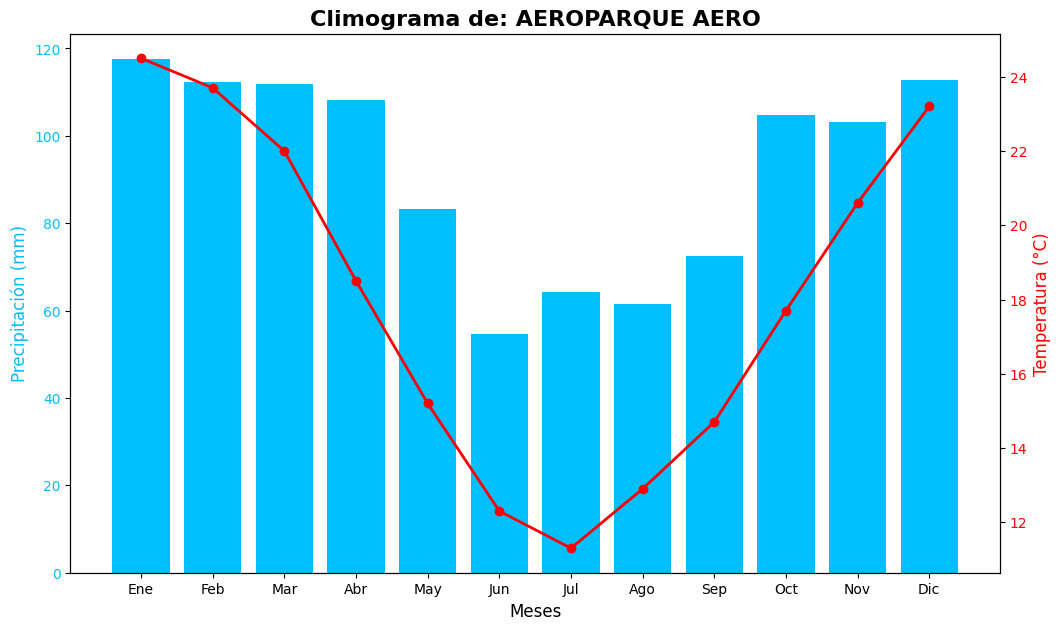

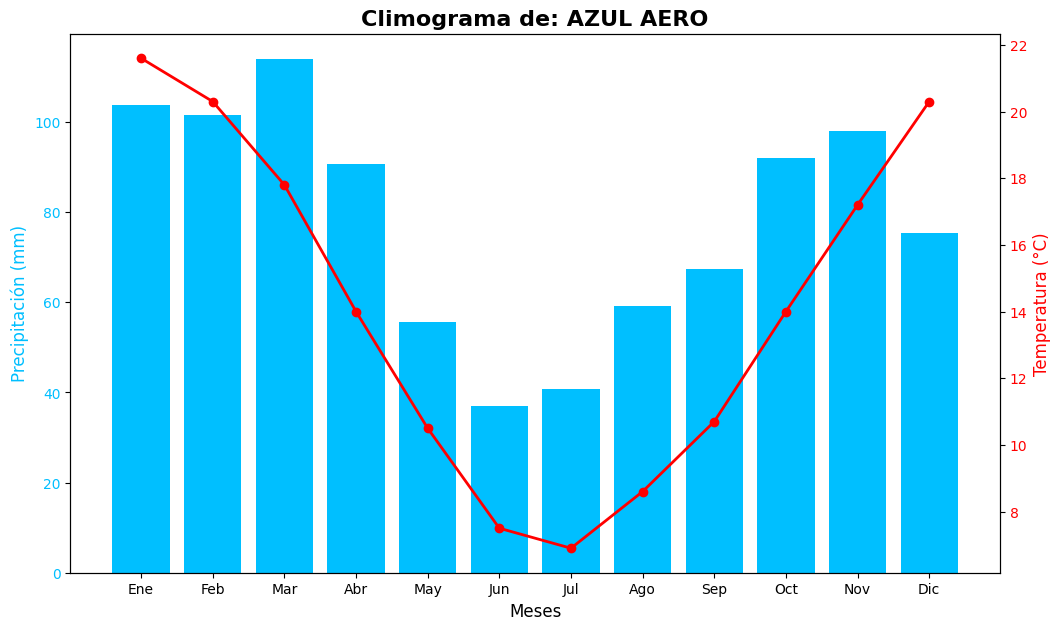

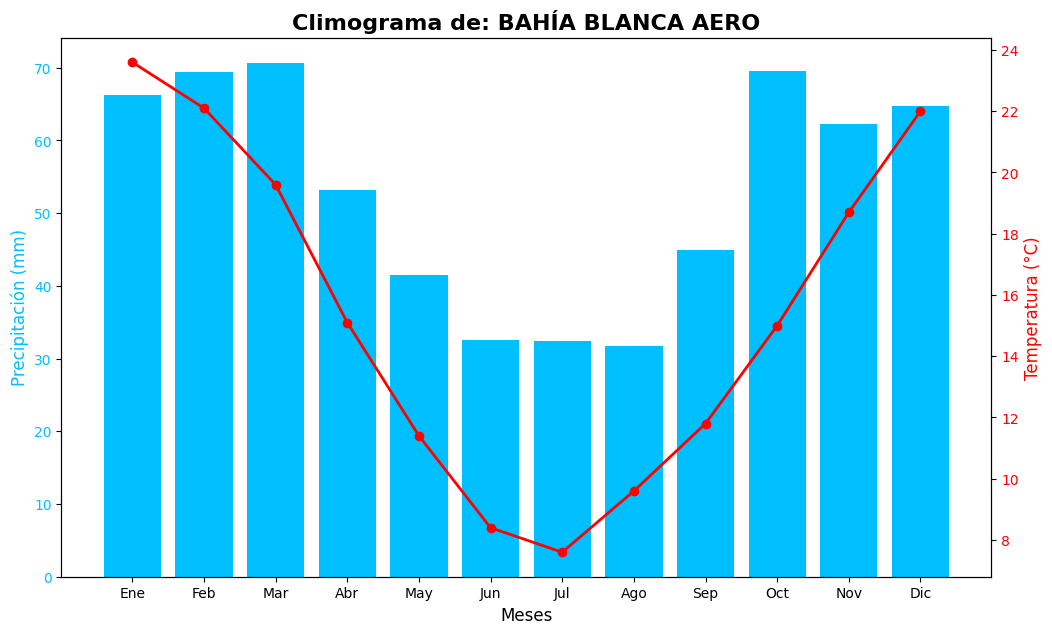

üíæ Proceso completado. Los gr√°ficos se han guardado en la carpeta 'climogramas'.


In [ ]:
# --- 1. Configuraci√≥n ---
# Directorio donde se guardar√°n los gr√°ficos
directorio_salida = 'climogramas'
# Crea el directorio si no existe, sin dar error si ya existe.
os.makedirs(directorio_salida, exist_ok=True)

# Lista de meses para el eje X
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Obtiene una lista √∫nica de todas las estaciones en tu DataFrame
estaciones_a_graficar = df_final_vector_pivot['Estacion_Limpia'].unique()
print(f"‚úÖ Se generar√°n gr√°ficos para {len(estaciones_a_graficar[:3])} estaciones.")

# --- 2. Bucle para generar y guardar los gr√°ficos ---
for estacion in estaciones_a_graficar[:3]:
    # Filtra los datos para la estaci√≥n actual del bucle
    estacion_data = df_final_vector_pivot[df_final_vector_pivot['Estacion_Limpia'] == estacion].iloc[0]

    # Extrae los datos usando los NUEVOS nombres de columna
    temperaturas = estacion_data['Temperatura_C']
    precipitaciones = estacion_data['Precipitacion_mm']

    # --- Creaci√≥n del gr√°fico (igual que antes) ---
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Barras de precipitaci√≥n
    ax1.bar(meses, precipitaciones, color='deepskyblue', label='Precipitaci√≥n (mm)')
    ax1.set_xlabel('Meses', fontsize=12)
    ax1.set_ylabel('Precipitaci√≥n (mm)', color='deepskyblue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='deepskyblue')

    # L√≠nea de temperatura en el segundo eje Y
    ax2 = ax1.twinx()
    ax2.plot(meses, temperaturas, color='red', marker='o', linestyle='-', linewidth=2, label='Temperatura (¬∞C)')
    ax2.set_ylabel('Temperatura (¬∞C)', color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')

    # T√≠tulo din√°mico para cada gr√°fico
    plt.title(f'Climograma de: {estacion}', fontsize=16, fontweight='bold')
    
    # --- 3. Guardar el gr√°fico en un archivo ---
    # Se crea un nombre de archivo √∫nico para cada estaci√≥n
    nombre_archivo = f"Climograma_{estacion.replace(' ', '_')}.png"
    ruta_completa = os.path.join(directorio_salida, nombre_archivo)
    
    # Guarda la figura en la ruta especificada
    plt.show(ruta_completa)
    
    # Cierra la figura para liberar memoria antes de pasar a la siguiente iteraci√≥n
    plt.close(fig)

‚úÖ Gr√°fico guardado como 'mapa_calor_nulos.png'


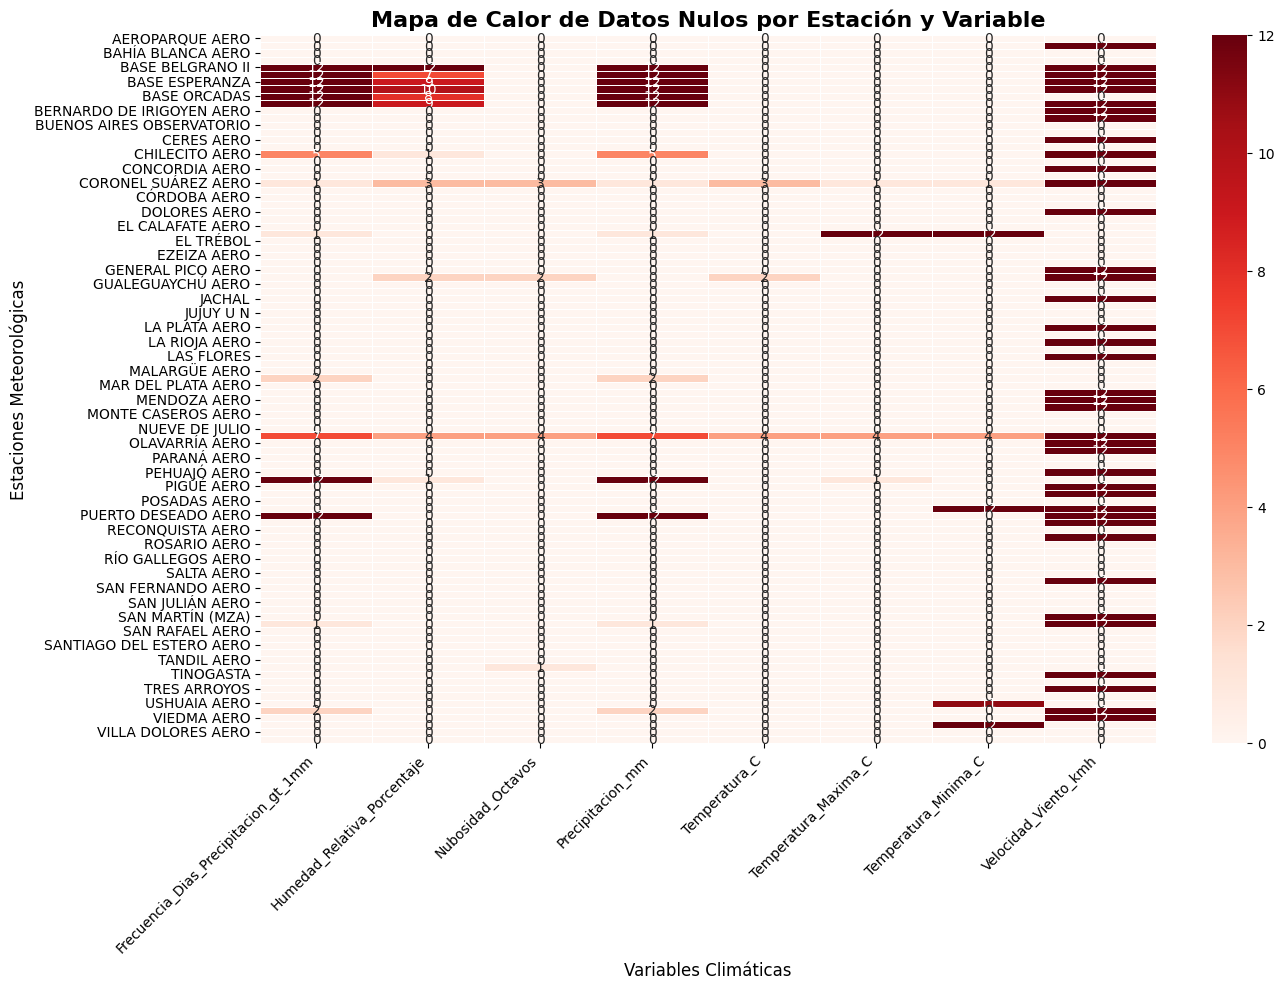

In [46]:

# --- 1. Cargar los datos ---
# Aseg√∫rate de que el archivo 'conteo_nulos_por_vector.csv' est√© en el mismo directorio
try:
    df_nulos = pd.read_csv('conteo_nulos_por_vector.csv')
except FileNotFoundError:
    print("Error: No se encontr√≥ el archivo 'conteo_nulos_por_vector.csv'.")
    # Salir del script si no se encuentra el archivo
    exit()

# --- 2. Preparar los datos para el gr√°fico ---
# Para que el mapa de calor funcione correctamente,
# las estaciones deben ser el √≠ndice del DataFrame.
df_nulos.set_index('Estacion_Limpia', inplace=True)

# Elimina las comillas que puedan haber quedado en los nombres de las estaciones
df_nulos.index = df_nulos.index.str.replace('"', '')

# --- 3. Generar el Mapa de Calor ---
plt.figure(figsize=(14, 10)) # Ajusta el tama√±o para que sea legible

heatmap = sns.heatmap(
    df_nulos, 
    annot=True,     # Muestra los n√∫meros (el conteo de nulos) en cada celda
    cmap='Reds',    # Paleta de colores: un rojo m√°s intenso significa m√°s nulos
    fmt='d',        # Formato de n√∫mero entero para las anotaciones
    linewidths=.5   # L√≠neas delgadas para separar las celdas
)

# --- 4. Personalizar y guardar el gr√°fico ---
plt.title('Mapa de Calor de Datos Nulos por Estaci√≥n y Variable', fontsize=16, fontweight='bold')
plt.xlabel('Variables Clim√°ticas', fontsize=12)
plt.ylabel('Estaciones Meteorol√≥gicas', fontsize=12)

# Rota las etiquetas del eje X para que no se superpongan
plt.xticks(rotation=45, ha='right')

# Ajusta el layout para que todo quepa en la imagen
plt.tight_layout()

# Guarda el gr√°fico en un archivo
nombre_archivo_salida = 'mapa_calor_nulos.png'
plt.savefig(nombre_archivo_salida, dpi=120)

print(f"‚úÖ Gr√°fico guardado como '{nombre_archivo_salida}'")

# Muestra el gr√°fico
plt.show()

In [ ]:
# --- 1. Aplanar los datos ---
# Crea un diccionario para almacenar las series de datos aplanadas
datos_planos = {}
# Identifica las columnas que contienen listas de valores
columnas_metricas = df_final_vector_pivot.select_dtypes(include='object').columns.drop('Estacion_Limpia')

for metrica in columnas_metricas:
    # 'explode' convierte cada elemento de una lista en su propia fila.
    # Esto une todos los valores mensuales de todas las estaciones en una sola columna.
    serie_aplanada = df_final_vector_pivot[metrica].explode().dropna().astype(float)
    datos_planos[metrica] = serie_aplanada

print("‚úÖ Datos aplanados correctamente.")

# --- 2. Calcular las estad√≠sticas ---
resultados_estadisticos = []

for nombre, datos in datos_planos.items():
    # Calcula la moda, manejando el caso de que no haya una √∫nica.
    moda = datos.mode()
    moda_valor = moda.iloc[0] if not moda.empty else np.nan
    
    # Crea un diccionario con todas las estad√≠sticas
    stats = {
        'Metrica': nombre,
        # Tendencia Central
        'Media': datos.mean(),
        'Mediana': datos.median(),
        'Moda': moda_valor,
        # Dispersi√≥n
        'Desv_Estandar': datos.std(),
        'Varianza': datos.var(),
        'Rango': datos.max() - datos.min(),
        'Rango_Intercuartil': datos.quantile(0.75) - datos.quantile(0.25),
        # Forma (Momentos de 3er y 4to orden)
        'Asimetria': datos.skew(),
        'Curtosis': datos.kurt()
    }
    resultados_estadisticos.append(stats)

# --- 3. Crear y mostrar el DataFrame de estad√≠sticas ---
df_estadisticas = pd.DataFrame(resultados_estadisticos).set_index('Metrica')

print("\n--- Tabla de Estad√≠sticas Anuales Generales ---")
# Muestra la tabla de estad√≠sticas redondeada a 2 decimales
display(df_estadisticas.round(2))

‚úÖ Datos aplanados correctamente.

--- Tabla de Estad√≠sticas Anuales Generales ---


Media  Mediana  Moda  Desv_Estandar  Varianza  Rango  Rango_Intercuartil  Asimetria  Curtosis
Metrica                                                                                                                            
Frecuencia_Dias_Precipitacion_gt_1mm   5.10      5.2   6.5           2.54      6.43   13.8                3.90       0.19     -0.19
Humedad_Relativa_Porcentaje           68.01     70.1  71.1          11.03    121.61   64.5               15.08      -0.72      0.12
Nubosidad_Octavos                      3.84      3.7   3.7           0.89      0.79    6.2                0.90       1.11      2.38
Precipitacion_mm                      68.23     58.9  24.4          51.67   2670.26  277.9               83.20       0.66     -0.26
Temperatura_C                         14.83     15.7  21.8           8.18     66.89   49.2               10.90      -1.09      1.77
Temperatura_Maxima_C                  21.22     22.4  27.9           8.94     79.90   53.0               10.88      -1.27      2.04
Temperatura_Minima_C                   9.10      9.9   4.9           7.78     60.51   47.5               10.60      -0.98      1.69
Velocidad_Viento_kmh                  13.01     11.8  10.4           5.55     30.85   32.6                6.70       0.96      0.97


--- Histogramas de Distribuci√≥n por M√©trica ---


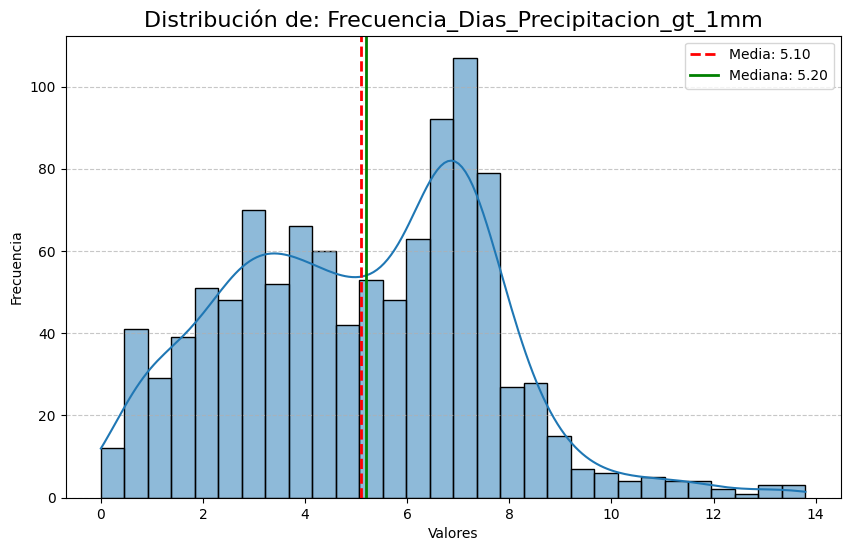

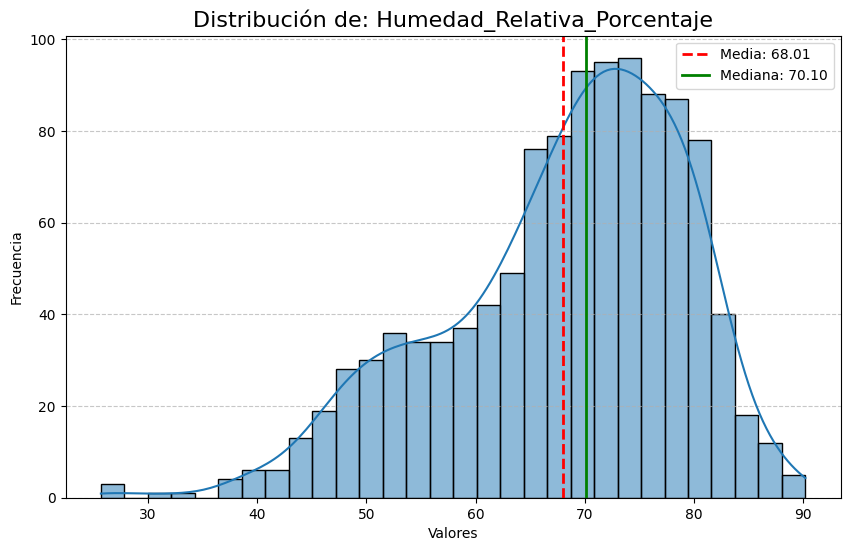

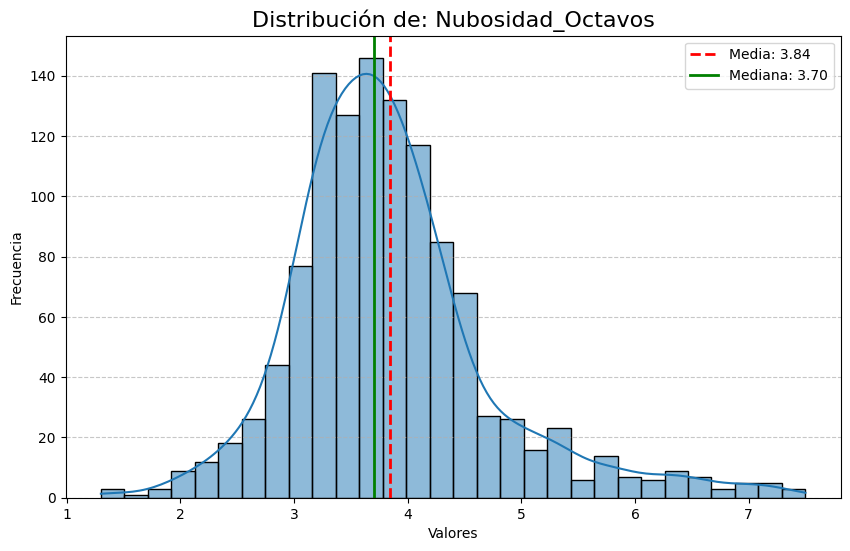

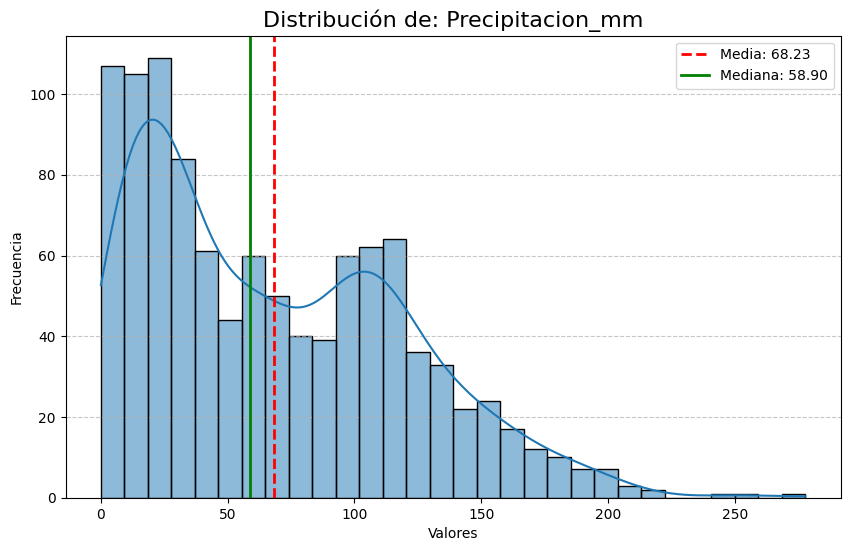

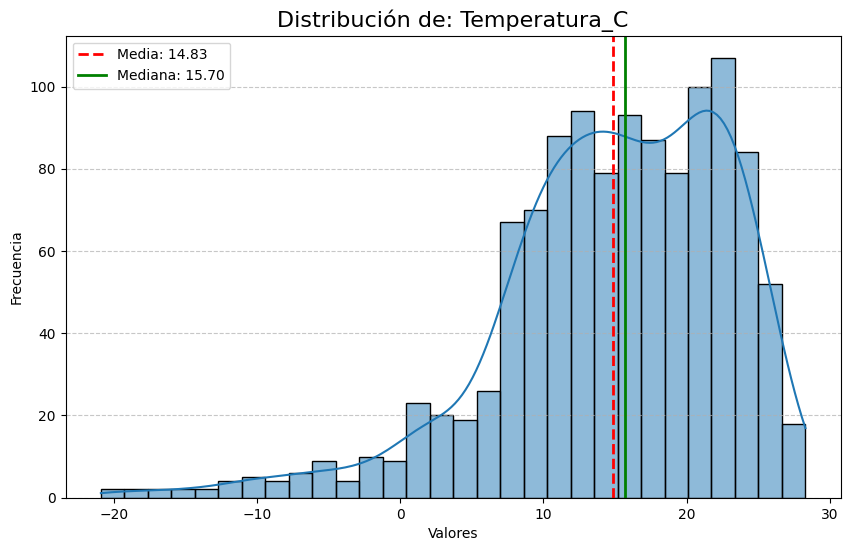

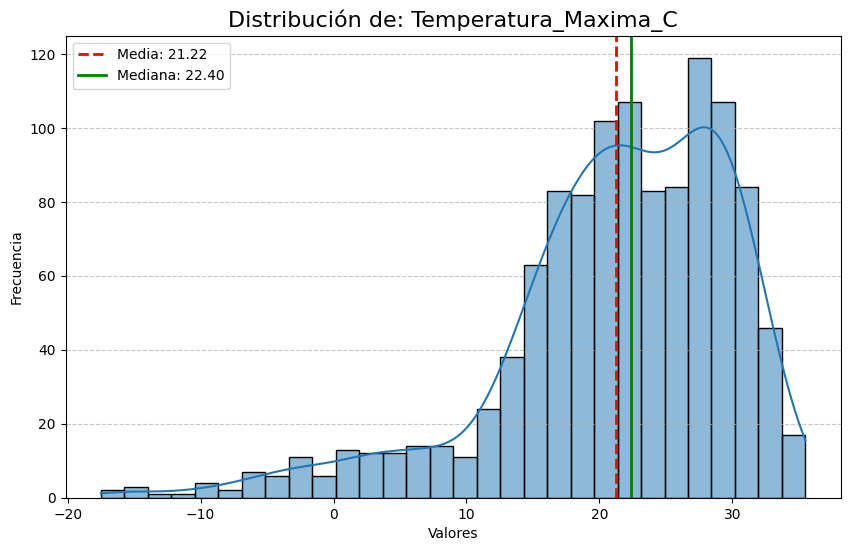

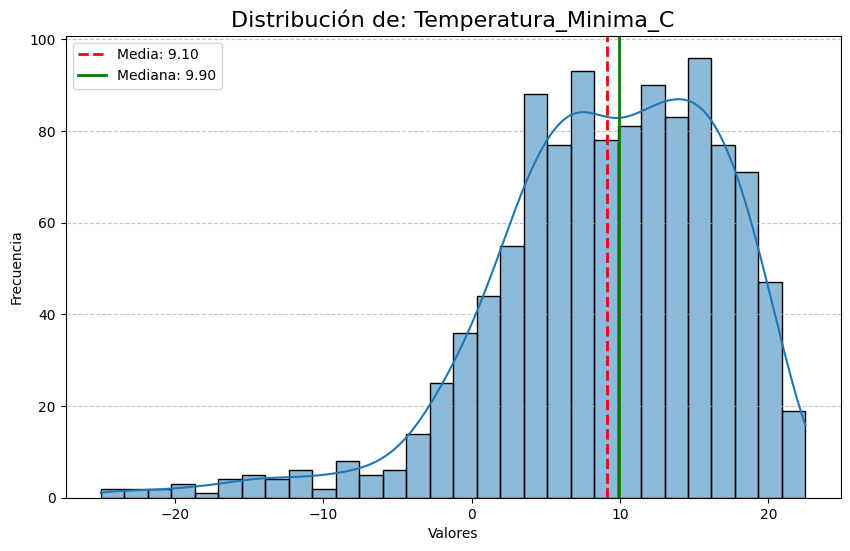

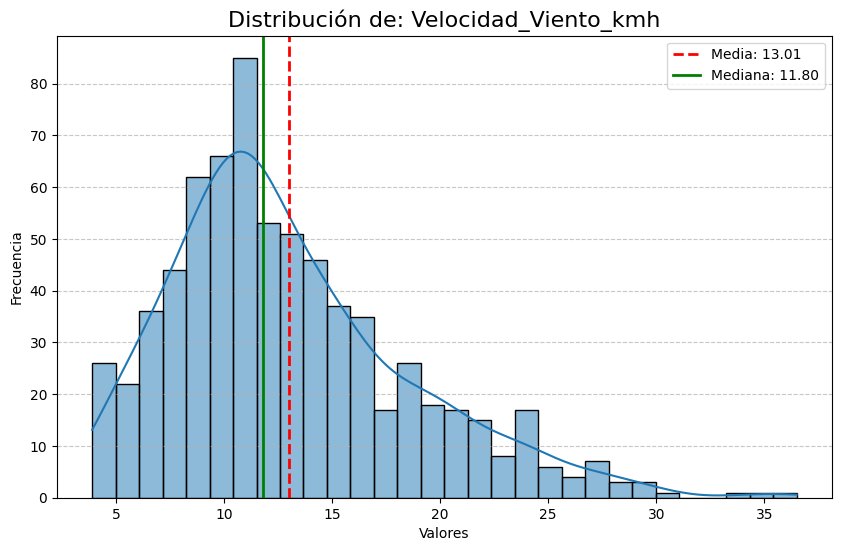

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Histogramas de Distribuci√≥n por M√©trica ---")

for nombre, datos in datos_planos.items():
    # Calcula la media y mediana para marcarlas en el gr√°fico
    media = datos.mean()
    mediana = datos.median()

    # --- Creaci√≥n del Gr√°fico ---
    plt.figure(figsize=(10, 6))
    
    # Crea el histograma con una curva de densidad (KDE)
    sns.histplot(datos, kde=True, bins=30)
    
    # A√±ade l√≠neas verticales para la media y la mediana
    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
    
    # T√≠tulos y leyendas
    plt.title(f'Distribuci√≥n de: {nombre}', fontsize=16)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Muestra el gr√°fico
    plt.show()


--- Box Plots para Detecci√≥n Visual de Outliers ---


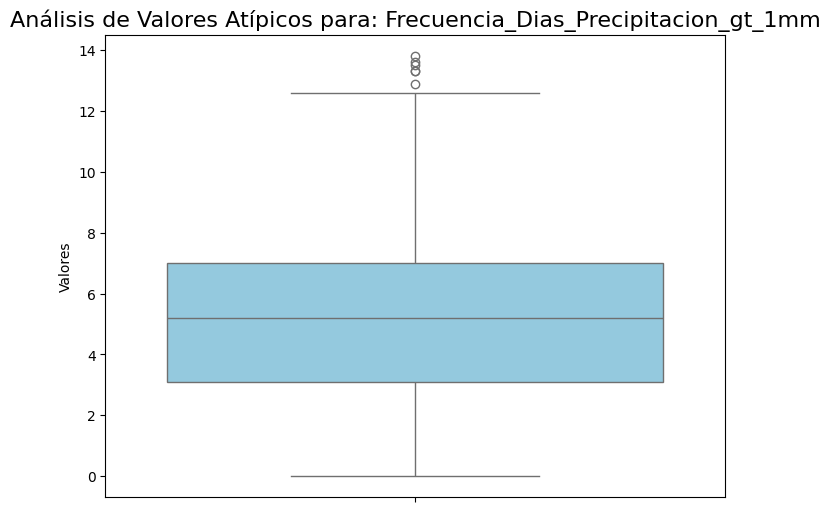

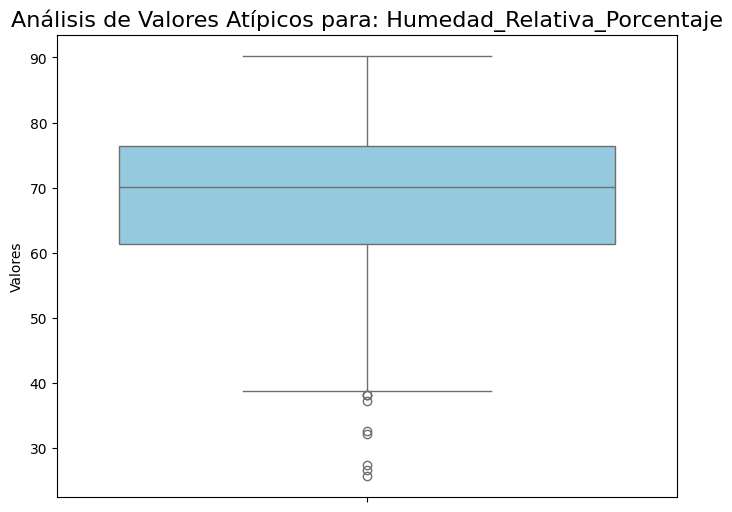

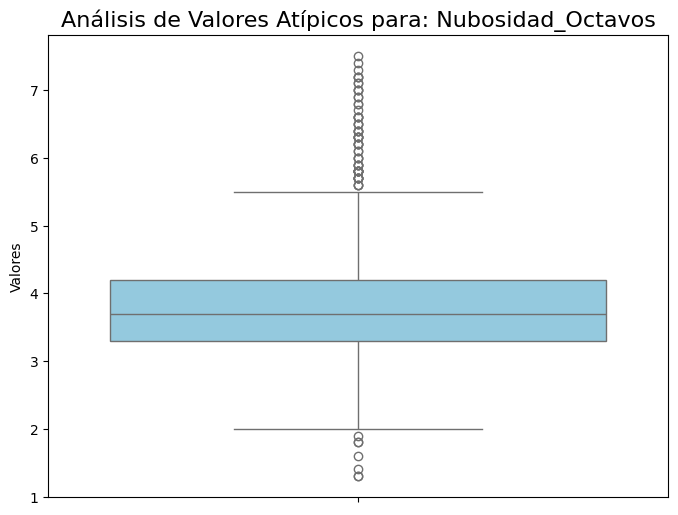

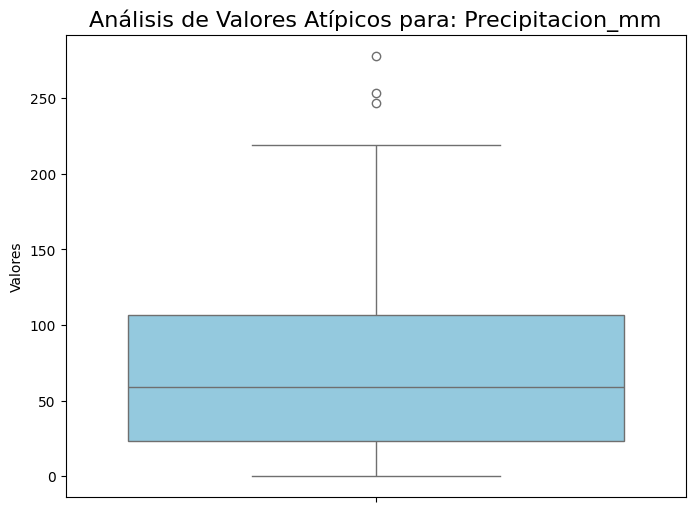

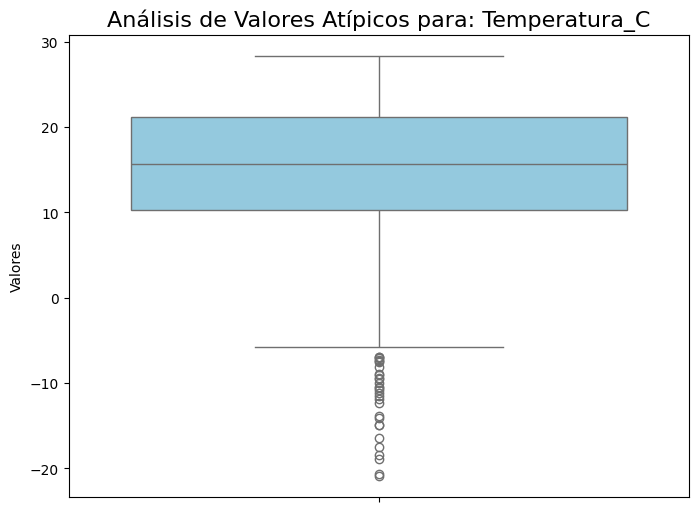

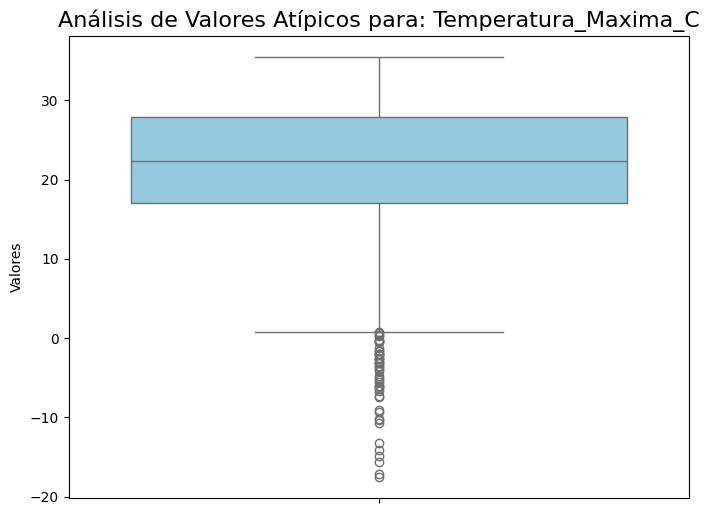

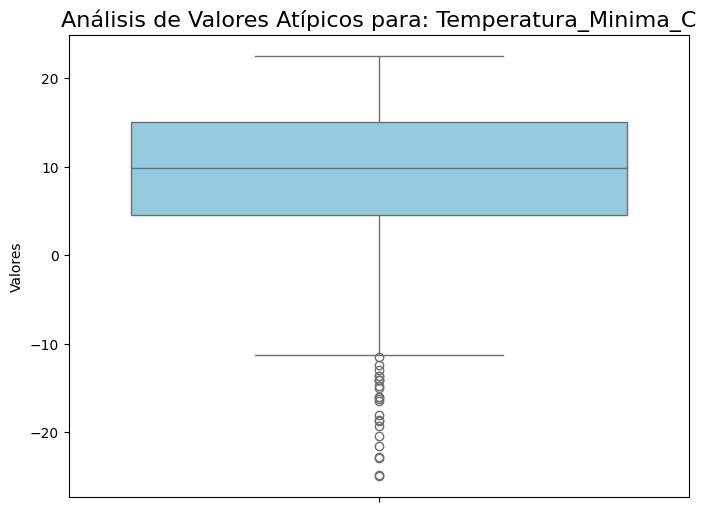

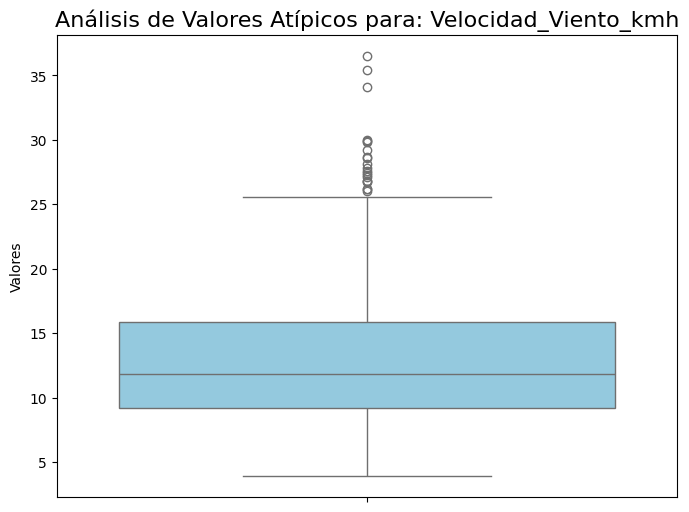

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Box Plots para Detecci√≥n Visual de Outliers ---")

# Usamos el diccionario 'datos_planos' que creamos en el paso anterior
for nombre, datos in datos_planos.items():
    plt.figure(figsize=(8, 6))
    
    # Crea el diagrama de caja
    sns.boxplot(y=datos, color='skyblue')
    
    # T√≠tulos
    plt.title(f'An√°lisis de Valores At√≠picos para: {nombre}', fontsize=16)
    plt.ylabel('Valores')
    
    # Muestra el gr√°fico
    plt.show()

In [17]:
print("\n--- Identificaci√≥n de Outliers con el M√©todo IQR ---")

for nombre, datos in datos_planos.items():
    # 1. Calcular Q1, Q3 y el Rango Intercuart√≠lico (IQR)
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    
    # 2. Definir los l√≠mites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # 3. Filtrar los datos para encontrar los outliers
    outliers = datos[(datos < limite_inferior) | (datos > limite_superior)]
    
    print(f"\nüîé An√°lisis para: {nombre}")
    if not outliers.empty:
        print(f"  Se encontraron {len(outliers)} outliers.")
        # Muestra los 5 outliers m√°s extremos (altos o bajos)
        print("  Algunos valores at√≠picos encontrados:")
        print(outliers.sort_values(ascending=False).head())
    else:
        print("  No se encontraron outliers con este m√©todo.")


--- Identificaci√≥n de Outliers con el M√©todo IQR ---

üîé An√°lisis para: Frecuencia_Dias_Precipitacion_gt_1mm
  Se encontraron 6 outliers.
  Algunos valores at√≠picos encontrados:
38    13.8
25    13.6
38    13.5
3     13.3
38    13.3
Name: Frecuencia_Dias_Precipitacion_gt_1mm, dtype: float64

üîé An√°lisis para: Humedad_Relativa_Porcentaje
  Se encontraron 9 outliers.
  Algunos valores at√≠picos encontrados:
77    38.2
77    38.1
53    38.1
53    37.2
41    32.6
Name: Humedad_Relativa_Porcentaje, dtype: float64

üîé An√°lisis para: Nubosidad_Octavos
  Se encontraron 69 outliers.
  Algunos valores at√≠picos encontrados:
8    7.5
8    7.4
8    7.3
8    7.2
8    7.2
Name: Nubosidad_Octavos, dtype: float64

üîé An√°lisis para: Precipitacion_mm
  Se encontraron 3 outliers.
  Algunos valores at√≠picos encontrados:
10    277.9
64    253.4
35    247.0
Name: Precipitacion_mm, dtype: float64

üîé An√°lisis para: Temperatura_C
  Se encontraron 29 outliers.
  Algunos valores at√≠picos en

In [18]:
import numpy as np

print("\n--- Identificaci√≥n de Outliers con el M√©todo Z-Score ---")

# Definimos el umbral del Z-score
umbral_z = 3

for nombre, datos in datos_planos.items():
    # 1. Calcular la media y la desviaci√≥n est√°ndar
    media = datos.mean()
    desv_estandar = datos.std()
    
    # 2. Calcular el Z-score para cada punto
    z_scores = (datos - media) / desv_estandar
    
    # 3. Filtrar los datos para encontrar los outliers
    outliers = datos[np.abs(z_scores) > umbral_z]
    
    print(f"\nüîé An√°lisis para: {nombre}")
    if not outliers.empty:
        print(f"  Se encontraron {len(outliers)} outliers (Z-score > {umbral_z}).")
        # Muestra los outliers encontrados
        print("  Valores at√≠picos encontrados:")
        print(outliers.sort_values(ascending=False).head())
    else:
        print("  No se encontraron outliers con este m√©todo.")


--- Identificaci√≥n de Outliers con el M√©todo Z-Score ---

üîé An√°lisis para: Frecuencia_Dias_Precipitacion_gt_1mm
  Se encontraron 6 outliers (Z-score > 3).
  Valores at√≠picos encontrados:
38    13.8
25    13.6
38    13.5
3     13.3
38    13.3
Name: Frecuencia_Dias_Precipitacion_gt_1mm, dtype: float64

üîé An√°lisis para: Humedad_Relativa_Porcentaje
  Se encontraron 5 outliers (Z-score > 3).
  Valores at√≠picos encontrados:
41    32.6
41    32.1
41    27.4
41    26.7
41    25.7
Name: Humedad_Relativa_Porcentaje, dtype: float64

üîé An√°lisis para: Nubosidad_Octavos
  Se encontraron 20 outliers (Z-score > 3).
  Valores at√≠picos encontrados:
8    7.5
8    7.4
8    7.3
8    7.2
8    7.2
Name: Nubosidad_Octavos, dtype: float64

üîé An√°lisis para: Precipitacion_mm
  Se encontraron 3 outliers (Z-score > 3).
  Valores at√≠picos encontrados:
10    277.9
64    253.4
35    247.0
Name: Precipitacion_mm, dtype: float64

üîé An√°lisis para: Temperatura_C
  Se encontraron 18 outliers (Z-